*   **Name: Niraj Lamichhane**

  

*   **Group: L6CG5**

*   **University_id: 2059514**

*   **Module Leader: Mr.Siman Giri**

*   **Tutor: Mr.Akash Adhikari**

# Image Compression Using Principal Component Analysis(PCA)

## Principal Component Analysis (PCA) is a linear dimensionality reduction technique (algorithm) that transform a set of correlated variables (p) into a smaller k (k<p) number of uncorrelated variables called principal components while keeping as much of the variability in the original data as possible.
## One of the use cases of PCA is that it can be used for image compression, a technique that minimizes the size in bytes of an image while keeping as much of the quality of the image as possible. In this assignment, we will discuss that technique by using the squid game image.

# What is Dimensional Reduction?

Dimensionality reduction is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension (number of variables needed in a minimal representation of the data). Here, in the coursework we will implement dimensionality reduction in the form of image. Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset. More input features often make a predictive modeling task more challenging to model, generally referred to as the curse of dimensionality.

# Load And Prepare The Data

## Load the image using image reading library, you can use Pillow or matplotlib or any other library of your confidence.

In [9]:
#Connecting to  the drive
from google.colab import drive
drive.mount('/content/drive')    

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#Importing the necessary python library for the coursework

import numpy as np                  # numpy is a library for scientific computing with Python        
import pandas as pd                 # importing pandas for data manipulation(for this assignment it is not necessary)
import matplotlib.pyplot as plt     #for data visualization
import seaborn as sns               #seaborn is a library for making statistical graphics in Python

## Let’s see an example to study how this algorithm works, this may not be the exact process this is just proposed for my field of study. The following files only contains the images. We are going to use a reduced image size and reconstruct set to simplify the calculations and provide plots to show what the PCA analysis is doing at each step.

In [11]:
#Path of image should be uploaded
path='/content/drive/MyDrive/Lena.png'

(256, 256)
(256, 256, 3)


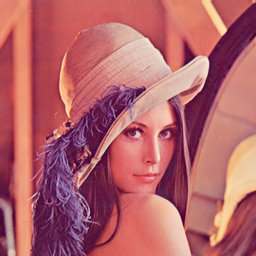

In [12]:
from PIL import Image
#Image is loaded
Img= Image.open(path)

#size of image
print(Img.size)
print(np.shape(Img))
Img

## 2. For the simplicity, convert the image into gray scale i.e. black and white.

(256, 256)


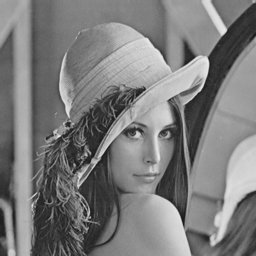

In [13]:
# Image is converted to gray because we will not hamper or orginal data

Img_gray= Img.convert('L')             # L stands for grayscale(Converting original image into gray scale for further task)

print(np.shape(Img_gray))
Img_gray                         #Display Gray Scale Image

## Standardize/Scale the data:

## To assure all the initial variables are transformed to same scale, it is a most to perform scaling operation before any PCA operation. For the same purpose, we will perform standardization of data, which satisfies the following expression:

## Since PCA directions are highly sensitive to the scale of the data, we must do feature scaling before applying PCA if the data is not measured on a similar scale. In the below figure, the pixel values of each image are ranging from 0 to 255 (similar scale)

In [14]:
#Converted the above image in array
Img_arr= np.array(Img_gray)
print(Img_arr)

[[161 161 161 ... 168 166 151]
 [162 161 161 ... 183 173 140]
 [161 161 160 ... 164 147 113]
 ...
 [ 49  53  55 ...  80  90  94]
 [ 48  51  53 ...  93  99 100]
 [ 46  48  50 ... 102 106 105]]


In [15]:
#All initial variables are converted to same scale

#finding the mean value for the above array
Mean= np.mean(Img_arr,axis=0)

#find the Standard deviation for the above array
std= np.std(Img_arr, axis=0)

#Standardize the data 

Img_Std= (Img_arr- Mean) /std
Img_Std

array([[ 1.68290245,  1.7160316 ,  1.73734821, ...,  0.68558678,
         0.64710966,  0.37469496],
       [ 1.7083648 ,  1.7160316 ,  1.73734821, ...,  0.9566869 ,
         0.77383029,  0.1759118 ],
       [ 1.68290245,  1.7160316 ,  1.71081906, ...,  0.61329341,
         0.30315365, -0.31201049],
       ...,
       [-1.16888118, -1.10638611, -1.07474132, ..., -0.90486724,
        -0.72871435, -0.65536322],
       [-1.19434354, -1.15865311, -1.12779962, ..., -0.6699138 ,
        -0.56578782, -0.54693604],
       [-1.24526824, -1.2370536 , -1.20738706, ..., -0.50725373,
        -0.43906719, -0.45658006]])

# Calculate Covarience Matrix

## Each element of the covariance matrix represents covariance between each ijth element. The covariance between two elements is calculated and stored in the matrix as shown in picture below:

## The covariance matrix is a matrix that summarises the variances and covariances of a set of vectors and it can tell a lot of things about your variables. The diagonal corresponds to the variance of each vector: A matrix A and its matrix of covariance. The diagonal corresponds to the variance of each column vector.C = cov( A ) returns the covariance. If A is a matrix whose columns represent random variables and whose rows represent observations, C is the covariance matrix with the corresponding column variances along the diagonal. C is normalized by the number of observations -1 . The covariance matrix provides a useful tool for separating the structured relationships in a matrix of random variables. This can be used to decorrelate variables or applied as a transform to other variables. It is a key element used in the Principal Component Analysis data reduction method, or PCA for short. The most important feature of covariance matrix is that it is positive semi-definite, which brings about Cholesky decomposition . In practice, people use it to generate correlated random variables by multiplying the lower triangular from decomposing covariance matrix by standard normals.

In [16]:
#calculated the covariance matrix using formula
#    ∑=1/n−1((X−x¯)T(X−x¯))   
#   Here  x¯  is the mean vector  x¯=1/n∑ni=1xi

Vectr_mean= np.mean(Img_Std, axis=0)

COvar_matrx= (Img_Std - Vectr_mean).T.dot((Img_Std - Vectr_mean))/ (Img_Std.shape[0] -1) 

#converted into square matrix of size 640 X 640
print(COvar_matrx.shape)
print("Covarience matrix \n %s" %COvar_matrx)


(256, 256)
Covarience matrix 
 [[ 1.00392157  0.99812026  0.97300159 ... -0.257698   -0.22779638
  -0.19318212]
 [ 0.99812026  1.00392157  0.9920108  ... -0.29760342 -0.26755531
  -0.23441652]
 [ 0.97300159  0.9920108   1.00392157 ... -0.32768449 -0.29899454
  -0.2695578 ]
 ...
 [-0.257698   -0.29760342 -0.32768449 ...  1.00392157  0.99539633
   0.97288698]
 [-0.22779638 -0.26755531 -0.29899454 ...  0.99539633  1.00392157
   0.99509993]
 [-0.19318212 -0.23441652 -0.2695578  ...  0.97288698  0.99509993
   1.00392157]]


#  Eigen Decomposition

## Decompose a covariance matrix into eigen values and eigen vectors:
## A(n*n)= PDPI

## Where:
## 1. A(n*n): −Covariance Matrix.
## 2. P:- Eigen Vector of Covariance Matrix.
## 3. D:- Diagonal Matrix. Diagonal elements are Eigen Values.
### 4. PI
## : −Inverse of Eigen Vector.

## The eigenvectors and eigenvalues of a covariance matrix represent the “core” of a PCA: the eigenvectors determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes. The eigenvector with the highest eigenvalue is, therefore, the first principal component. Each point on the photo can be represented as a vector pointing from the center of the painting to that point. The linear transformation in this example is called a shear mapping. Points in the top half are moved to the right, and points in the bottom half are moved to the left, proportional to how far they are from the horizontal axis that goes through the middle of the painting. The vectors pointing to each point in the original image are therefore tilted right or left, and made longer or shorter by the transformation. Points along the horizontal axis do not move at all when this transformation is applied. Therefore, any vector that points directly to the right or left with no vertical component is an eigenvector of this transformation, because the mapping does not change its direction. Moreover, these eigenvectors all have an eigenvalue equal to one, because the mapping does not change their length either.

In [17]:
#Covariance matrix is decompiosed into eigen values and eign vectors
from numpy.linalg import eig
eign_values, eign_vctr= eig(COvar_matrx)    

print("Eignvalues \n%s"  %eign_values)
print("\nEignvectors \n%s"  %eign_vctr)
eign_values.shape

Eignvalues 
[ 5.86324179e+01  3.93211453e+01  2.41523595e+01  2.12959731e+01
  1.69170709e+01  1.26109394e+01  1.10830563e+01  6.54650137e+00
  5.11700980e+00  4.62576021e+00  4.24199665e+00  3.34159963e+00
  3.19043065e+00  2.95994367e+00  2.75810551e+00  2.31691352e+00
  2.12898830e+00  2.06489516e+00  1.96849129e+00  1.68688720e+00
  1.56060778e+00  1.34669586e+00  1.37277494e+00  1.22152991e+00
  1.19034997e+00  1.12736549e+00  1.04806907e+00  1.00586208e+00
  9.02406285e-01  8.53949226e-01  8.36717026e-01  7.72120933e-01
  7.42084420e-01  7.00034506e-01  6.38705650e-01  6.05236053e-01
  5.98656270e-01  5.84939719e-01  5.27003628e-01  5.08537173e-01
  4.71201097e-01  4.56386400e-01  4.41767476e-01  4.31388282e-01
  3.90860308e-01  3.79299315e-01  3.71090626e-01  3.44135530e-01
  3.19049596e-01  3.14007905e-01  2.95224509e-01  2.94409433e-01
  2.85714800e-01  2.63983651e-01  2.65662376e-01  2.39749244e-01
  2.38199822e-01  2.23151576e-01  2.07620561e-01  2.03548881e-01
  2.02395678e

(256,)

In [18]:
# length of eignvector must be 1 for the above image

# check whether or not we can compress and reconstruct the given image

for egnVec in eign_vctr.T:
         np.testing.assert_array_almost_equal(1.0, np.linalg.norm(egnVec))
print("Its okay you dont have to worry, now you can compress and reconstruct your image")

Its okay you dont have to worry, now you can compress and reconstruct your image


## The main aspect of the PCA is to reduce dimension of matrix by projecting it on lower dimension space while preserving as much variance in the data  as we can where eigen vectors act as axes.
## The dimension should reduced in such a way that the reduced dimension must describe the  more feature of original data. In another words, the eigen values which carry less information can be eliminated by keeping valuable eigen values(which carry more information). This can be done by ordering the eigen values from high rank to low rank corresponding to vectors.

In [19]:
# argsort() return the indeces that would sort eigen values in ascending order
#[::-1] reverse the order()
SortEgn=eign_values.argsort()[::-1]
#get the values in array 
eigenvalues = eign_values[SortEgn]
#It does the same thing for the column of eigen vector and sorted as per eigenvalues
eigenvectors= eign_vctr[:,SortEgn ]
eigenvalues

array([ 5.86324179e+01,  3.93211453e+01,  2.41523595e+01,  2.12959731e+01,
        1.69170709e+01,  1.26109394e+01,  1.10830563e+01,  6.54650137e+00,
        5.11700980e+00,  4.62576021e+00,  4.24199665e+00,  3.34159963e+00,
        3.19043065e+00,  2.95994367e+00,  2.75810551e+00,  2.31691352e+00,
        2.12898830e+00,  2.06489516e+00,  1.96849129e+00,  1.68688720e+00,
        1.56060778e+00,  1.37277494e+00,  1.34669586e+00,  1.22152991e+00,
        1.19034997e+00,  1.12736549e+00,  1.04806907e+00,  1.00586208e+00,
        9.02406285e-01,  8.53949226e-01,  8.36717026e-01,  7.72120933e-01,
        7.42084420e-01,  7.00034506e-01,  6.38705650e-01,  6.05236053e-01,
        5.98656270e-01,  5.84939719e-01,  5.27003628e-01,  5.08537173e-01,
        4.71201097e-01,  4.56386400e-01,  4.41767476e-01,  4.31388282e-01,
        3.90860308e-01,  3.79299315e-01,  3.71090626e-01,  3.44135530e-01,
        3.19049596e-01,  3.14007905e-01,  2.95224509e-01,  2.94409433e-01,
        2.85714800e-01,  

# Identify Principal Components:

## Determine the explained variance by each principal components, based on this we can determine how many principal components to pick from.

## • Experiment with Principal Components:

## – Pick three different combination of principal components with various explained variance value and compare the result.





In [20]:
# The total sum of eigen values is calculated
Ttl_sum_evalues= sum(eign_values)

# The principal components is calculated by iterating on eigen values where the amount of percent bear by each values has obtained
# Those value has more percentage means the first principal component which carry the more information among the all

Explaind_var= [ ( i / Ttl_sum_evalues)*100  for i in eigenvalues]
Explaind_var

[22.81382226956075,
 15.299823087546146,
 9.397661852548953,
 8.286244397834107,
 6.582417427128265,
 4.906905423370117,
 4.3124074579777485,
 2.5472379298757617,
 1.9910240145937619,
 1.7998792308079647,
 1.6505571669175008,
 1.3002134792523314,
 1.2413937630426621,
 1.1517114807476867,
 1.0731764309612122,
 0.9015090130855946,
 0.8283874768711117,
 0.8034488924537269,
 0.7659382289548139,
 0.6563663250710513,
 0.6072311171060379,
 0.5341455238879875,
 0.5239981747372687,
 0.4752962151551686,
 0.4631641264382161,
 0.43865692184651806,
 0.40780275268484867,
 0.3913800516554404,
 0.35112549233191476,
 0.33227089339041604,
 0.3255658592330351,
 0.300431576389373,
 0.2887443954176315,
 0.2723828109626224,
 0.2485198071912665,
 0.23549681620225402,
 0.2329366284112271,
 0.2275995306621299,
 0.20505664853532374,
 0.19787136717887974,
 0.183343932545413,
 0.17757954715243532,
 0.17189133674987497,
 0.16785280148670495,
 0.15208340223861144,
 0.14758503023908062,
 0.144391036471194,
 0.133902

In [21]:
# Calculate Cumulative expected variance which is the amount of variance in dataset that is bear by number of principal components
cumlat_varnc_expln = np.cumsum(Explaind_var)

In [22]:
count=0
for i in cumlat_varnc_expln:
        if i<=95:
          count+=1
count

38

In [23]:
cumlat_varnc_expln

array([ 22.81382227,  38.11364536,  47.51130721,  55.79755161,
        62.37996903,  67.28687446,  71.59928192,  74.14651985,
        76.13754386,  77.93742309,  79.58798026,  80.88819374,
        82.1295875 ,  83.28129898,  84.35447541,  85.25598443,
        86.0843719 ,  86.88782079,  87.65375902,  88.31012535,
        88.91735647,  89.45150199,  89.97550016,  90.45079638,
        90.91396051,  91.35261743,  91.76042018,  92.15180023,
        92.50292572,  92.83519662,  93.16076248,  93.46119405,
        93.74993845,  94.02232126,  94.27084107,  94.50633788,
        94.73927451,  94.96687404,  95.17193069,  95.36980206,
        95.55314599,  95.73072554,  95.90261687,  96.07046968,
        96.22255308,  96.37013811,  96.51452914,  96.64843198,
        96.77257389,  96.89475409,  97.00962569,  97.12418014,
        97.23535152,  97.33872052,  97.44143632,  97.53472254,
        97.62740589,  97.71423397,  97.79501895,  97.87421964,
        97.95297162,  98.02898602,  98.10227671,  98.17

In [24]:
#These are the principal components
#The principal components of a dataset are the projections of the data onto the eigenvectors of its covariance matrix.
principal= eign_vctr.T.dot(Img_Std.T)
principal

array([[ 6.99682889e+00,  6.93328059e+00,  6.86556218e+00, ...,
         6.86309142e-01,  1.00972504e+00,  7.88936919e-01],
       [-6.07754833e-01, -5.28822789e-01, -8.03556908e-01, ...,
        -9.11246365e+00, -8.78415997e+00, -8.82328746e+00],
       [-6.52162676e+00, -6.38314656e+00, -6.50396510e+00, ...,
         4.01443008e+00,  4.00583112e+00,  4.22167988e+00],
       ...,
       [ 2.21607822e-04, -8.68071870e-05, -1.93336402e-04, ...,
        -4.68216211e-04,  2.16030661e-04,  5.98829110e-05],
       [-3.24160044e-04,  1.25357657e-03, -9.80107446e-04, ...,
        -5.52096549e-04,  3.22303853e-04, -1.08813304e-04],
       [ 8.32618848e-04, -1.12138460e-03,  5.70084493e-04, ...,
        -5.19846289e-04,  2.56625211e-04, -8.13285409e-05]])

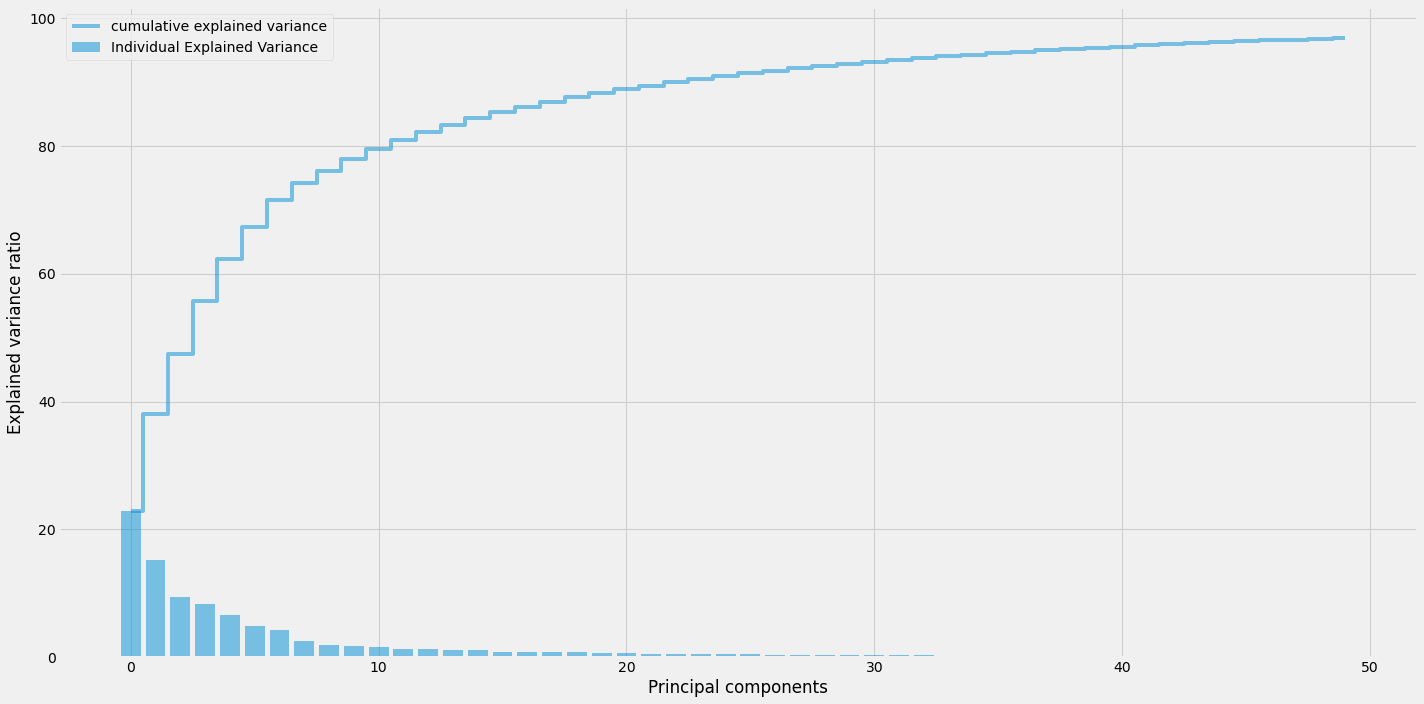

In [25]:
#Experiment with the principal components and explained variance

K=50
#selecting the top k eigen values
Top_K_vlus = eign_values[:K]
Explaind_varie= [ ( i / Ttl_sum_evalues)*100  for i in Top_K_vlus]

cumlat_varnc_expln = np.cumsum(Explaind_varie)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
plt.bar( range(50), Explaind_varie ,
         alpha=0.5, align='center' , label= "Individual Explained Variance")
plt.step(range(50), cumlat_varnc_expln, where='mid',alpha=0.5,
             label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.legend()
plt.tight_layout()
plt.show()
        

From the above bar chart, it is shown that the first principal carries more information than other. The first principal contained 22% of variance (information), 2nd principal contained 15% ,3rd 9% and so on. It is always in decreasing order.  Where cumulative explained varianced gives the % of top K principal components.

##Comparing the three different combination of principal components

In [26]:
K=10
#selecting the top k eigen values
Top_K_vlus = eign_values[:K]

C1= sum(Top_K_vlus)

#How much 20 combination of principal components retained the variation of original data

V10= (C1/Ttl_sum_evalues)
V10


0.7793742309124357

In [27]:
K=20
#selecting the top k eigen values
Top_K_vlus = eign_values[:K]

C1= sum(Top_K_vlus)

#How much 20 combination of principal components retained the variation of original data

V20= (C1/Ttl_sum_evalues)
V20


0.8831012534860126

In [28]:
K=30
#selecting the top k eigen values
Top_K_vlus = eign_values[:K]

C1= sum(Top_K_vlus)

#How much 20 combination of principal components retained the variation of original data

V30= (C1/Ttl_sum_evalues)
V30


0.928351966178351

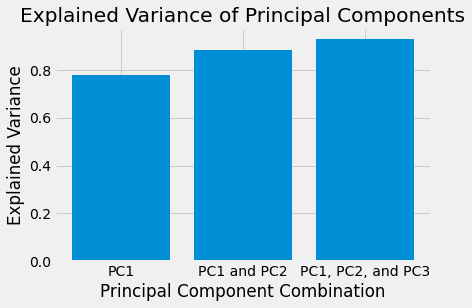

In [29]:
# Experiment with the principal components and explained variance
plt.style.use('fivethirtyeight')
combinations = ['PC1', 'PC1 and PC2', 'PC1, PC2, and PC3']
explained_variance = [V10, V20, V30]

# Creating the bar chart
plt.bar(combinations, explained_variance)

# Add a title and axis labels
plt.title('Explained Variance of Principal Components')
plt.xlabel('Principal Component Combination')
plt.ylabel('Explained Variance')

# Show the chart
plt.show()

From the above bar chart, I pick three combination of principal components.Whre PC1= First 10 principal components with explained variance 77%, 
PC2= First 20 principal components with explained variance 88%, 
PC3= First 30 principal components with explained variance 92%.
From this it shown that the more number of principal components we pick the more information it will carry. 

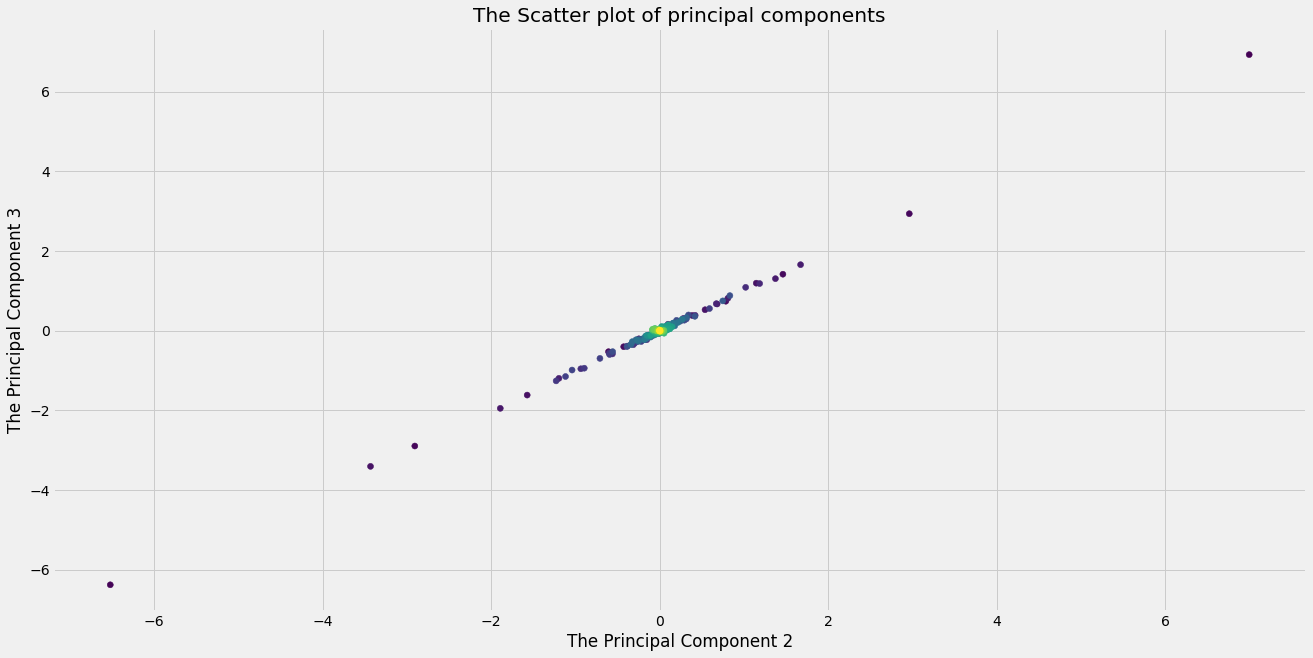

In [30]:
# Plot these principals using scatter graph

plt.style.use('fivethirtyeight')

pc1= principal[: , 0]
pc2= principal[: , 1]
plt.figure(figsize=(20, 10))
plt.scatter(pc1, pc2, c=range(len(pc1)))
plt.xlabel("The Principal Component 2")
plt.ylabel("The Principal Component 3")
plt.title("The Scatter plot of principal components")
plt.show()

The above scatter plot shows the correlation between pricipal component 1 and pricipal component 2. This shows that these two components are highly correlated. This means both components are carrying approx information(variance).

# Reconstruction of the image:

## Reconstruct the image based on number of principal components you picked in step 5.5.
## Reconstruct all three images and conclude the result based on your observation. Display the reconstructed
## image, experiment with various number of components.

In [31]:
K=38
# Selecting the top k eigen values
Top_K_vlus = eign_values[:K]
# Selecting the top k eigen vectors
Top_K_vctrs=  eign_vctr[:,:K]

# Stack these selected vectors in a matrix
Reducd_egnvctrs= np.vstack(Top_K_vctrs)
Reducd_egnvctrs.shape

(256, 38)

In [32]:
def  pca_reconsturct(Img_gray, vals):
 # COvar_matrx, Img_arr
   imgmat= np.array(list(Img_gray.getdata(band=0)), float)
   imgmat.shape= (Img_gray.size[1], Img_gray.size[0])

   cov_mat  = imgmat- np.mean(imgmat , axis =1)


   eign_values, eign_vctr= eig(np.cov(cov_mat))
  # Calculating the size of eigen vector
   p= np.size(eign_vctr, axis=1)

   Srtegn=np.argsort(eign_values)
   Srtegn= Srtegn[::-1]
   eign_values = eign_values[Srtegn]
   eign_vctr= eign_vctr[:,Srtegn ]
  # Checking the eigen values between 0 or p
   if vals < p or vals > 0:
     eign_vctr= eign_vctr[:,range(vals) ]
     # Project the matrix(covariance) onto the eigenvectors by taking dot product
   score = np.dot(eign_vctr.T, cov_mat )
   # Reconstruct the original matrix by projecting the projected matrix back onto the original space using eigenvectors
   recon = np.dot(eign_vctr, score) + np.mean(imgmat, axis =1).T  #Some normalization can be used to make image quality better
 
   return recon


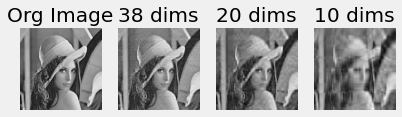

In [34]:
img1=  pca_reconsturct(Img_gray, 38)
img2 =  pca_reconsturct(Img_gray, 20)
img3 =  pca_reconsturct(Img_gray, 10)



fig, [ax1, ax2, ax3, ax4] = plt.subplots(1,4)

ax1.axis('off')
ax1.imshow(Img_gray, cmap= plt.get_cmap('gray') )
ax1.set_title('Org Image')

ax2.axis('off')
ax2.imshow(img1, cmap= plt.get_cmap('gray') )
ax2.set_title('38 dims')


ax3.axis('off')
ax3.imshow(img2, cmap= plt.get_cmap('gray') )
ax3.set_title('20 dims')

ax4.axis('off')
ax4.imshow(img3, cmap= plt.get_cmap('gray') )
ax4.set_title('10 dims')
plt.show()



## First, we reduced the dimension from 3 to 2 by converting an image to grayscale. After standardizing the data, the covariance matrix was computed. After that, we analyzed the problem using linear algebra and determined the eigenvalues and eigenvectors. Following that, we coupled all of the eigen values with their corresponding eigen vectors and ranked the eigen pairs so that we could select the eigen vectors with the highest eigen values for selecting the principal components. Following that, we computed the explained variance and cumulative explained variance and plotted them on a bar-step diagram. By displaying their percentage weight in the data, we were able to determine the explained variance by which we would be able to select a sufficient number of primary components. Afterward, we made sure to compress the data using the compression feature.
## Image is reconconstructed using above function. It is done by projecting the projected matrix back onto the original space. By this we can compare the quality of image through the comnination of principal components. Higher the combination higher will be the quality. The first principal has always bear highest information. SO, from the image shown above we can clearly see the first 38 principal conmponents has high quality than first 20. I choose first 38 principal components because it retain almost 95% of information(variance).